<a href="https://colab.research.google.com/github/allaalmouiz/loan_acceptance_prediction/blob/main/Loan_Acceptance_Prediction_Challange_AlaaAlmouiz(S2026_176).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Acceptance Prediction Challange - Module 1
Submitted by: **`Alaa Almouiz F. Moh.`**

ID Number: **`S2026_176`**

Track: **Machine Learning**

For: **ZAKA ©**

## **1- Problem Statement (Objective)**
In a bank, if someone applies for a loan! How likely he/she is getting the loan based on their profile (features).
**Binary Classification Problem**

In this colab, I will take you through the Data Science Lifecycle, till I build a simple machine learning model that predicts whether a person’s loan will be accepted or rejected based on his/her feature.

### **Dataset**
Loan Dataset (Download here: [Training Data](https://drive.google.com/file/d/1kOZgprQhpJ0EQkCU-WBhE5Y8toW8bHnk/view), [Testing Data](https://drive.google.com/file/d/1r4AyrYG2D-0DFt0fpOW-QCK6K9YrL6EP/view)).
The dataset variables include:

* `Loan_ID` data set unique ID
* `Gender` individual gender
* `Married` individual marital status
* `Dependents` number of dependents
* `Education` individual education status
* `Self_Employed` individual employment status
* `ApplicantIncome` individual income
* `CoapplicantIncome` individual Co Applicant income
* `LoanAmount` Loan amount in thousands
* `Loan_Amount_Term` term of loan in months
* `Credit_History` credit history meets guidelines
* `Property_Area` Urban/ Semi Urban/ Rural
* `Loan_Status` loan approved (Y/N) - TARGET

### **Assumptions and Hypothesis**
1. **H1: Credit History is the Most Significant Predictor**
  Null (H0): Credit history has no significant effect on loan approval
Alternative (H1): Credit history has the strongest positive relationship with loan approval
Rationale: Banks typically prioritize credit history as it directly indicates past repayment behaviorst

2. **H2: Higher Income Increases Loan Approval Probability**
  Null (H0): Income has no relationship with loan approval
Alternative (H1): Applicants with higher combined income (applicant + coapplicant) are more likely to be approved
Rationale: Income determines repayment capacity


##  **2- Datasets Preparation**

In [ ]:
# Cloning the datasets from the github
!git clone https://github.com/allaalmouiz/loan_acceptance_prediction.git

%cd loan_acceptance_prediction


Cloning into 'loan_acceptance_prediction'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'loan_acceptance_prediction'
/content/loan_acceptance_prediction/loan_acceptance_prediction/loan_acceptance_prediction


**Import necessary python modules**

We will need the following libraries:

* Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
* Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
* Matplotlib — plotting & visualization.
* scikit-learn — a tool for data mining and machine learning models.



In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Loading the Training and the Testing Datasets
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [ ]:
test_df  = pd.read_csv("test.csv")

## **3- EDA: Treating the Training Dataset**



### Understanding the Data


In [ ]:
# Showing the first 5 samples
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Showing the last 5 samples
train_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y
512,LP002643,Male,Yes,2,Graduate,No,3283,2035.0,148.0,360.0,1.0,Urban,Y


In [ ]:
# Checking the datatypes of the Training Dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


In [ ]:
# Lowering all the coulmns names
train_df.columns = train_df.columns.str.lower()
train_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
categorical = list(train_df.dtypes[train_df.dtypes == 'object'].index)
print("Categorical Columns")
print(categorical)

print("")

numerical = list(train_df.dtypes[train_df.dtypes != 'object'].index)
print("Numerical Columns")
print(numerical)

Categorical Columns
['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'property_area', 'loan_status']

Numerical Columns
['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history']


In [ ]:
# Lowering all the column values (Categorical only)
for col in categorical:
    train_df[col] = train_df[col].str.lower().str.replace(' ', '_')

train_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not_graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [ ]:
# Information about the data and it's values

print ("Information about the Categorical columns")
for col in train_df[categorical].columns:
    print(col)
    print("The first 5 unique values", train_df[col].unique()[:5])
    print("The number of unique values", train_df[col].nunique())
    print("")
print("======")

print ("Information about the Numerical columns")
for col in train_df[numerical].columns:
    print(col)
    print("The first 5 unique values", train_df[col].unique()[:5])
    print("The number of unique values", train_df[col].nunique())
    print("")


Information about the Categorical columns
loan_id
The first 5 unique values ['lp001002' 'lp001003' 'lp001005' 'lp001006' 'lp001008']
The number of unique values 513

gender
The first 5 unique values ['male' 'female' nan]
The number of unique values 2

married
The first 5 unique values ['no' 'yes' nan]
The number of unique values 2

dependents
The first 5 unique values ['0' '1' '2' '3+' nan]
The number of unique values 4

education
The first 5 unique values ['graduate' 'not_graduate']
The number of unique values 2

self_employed
The first 5 unique values ['no' 'yes' nan]
The number of unique values 2

property_area
The first 5 unique values ['urban' 'rural' 'semiurban']
The number of unique values 3

loan_status
The first 5 unique values ['y' 'n']
The number of unique values 2

Information about the Numerical columns
applicantincome
The first 5 unique values [5849 4583 3000 2583 6000]
The number of unique values 426

coapplicantincome
The first 5 unique values [   0. 1508. 2358. 4196. 1

In [ ]:
# Shape of the data
print("Shape of the Training Dataset: ", train_df.shape)

Shape of the Training Dataset:  (513, 13)


## **4- Cleaning the Data**

### The Missing Values

In [ ]:
# Calculating the null values
print("Null Values per column", train_df.isnull().sum())

Null Values per column loan_id               0
gender               10
married               3
dependents           12
education             0
self_employed        27
applicantincome       0
coapplicantincome     0
loanamount           18
loan_amount_term     14
credit_history       43
property_area         0
loan_status           0
dtype: int64


**For handelling the mising values:**

The categorical data will be filled by the `mode`:  gender, married, dependents, self_employed

and the numerical data will be filled with the `mean`:  loanamount, loan_amount_term, credit_history

In [ ]:
# Categorical Data: Calculating the mode
gender_mode = train_df['gender'].mode()[0]
married_mode = train_df['married'].mode()[0]
dependents_mode = train_df['dependents'].mode()[0]
self_employed_mode = train_df['self_employed'].mode()[0]

print("Gender Mode: ", gender_mode)
print("Married Mode: ", married_mode)
print("Dependents Mode: ", dependents_mode)
print("Self_Employed Mode: ", self_employed_mode)

Gender Mode:  male
Married Mode:  yes
Dependents Mode:  0
Self_Employed Mode:  no


In [ ]:
# Filling the missing values with the mode
train_df["gender"].fillna(gender_mode, inplace=True)
train_df["married"].fillna(married_mode, inplace=True)
train_df["dependents"].fillna(dependents_mode, inplace=True)
train_df["self_employed"].fillna(self_employed_mode, inplace=True)

# Recheching for the null values
print("Null Values per column", train_df[categorical].isnull().sum())

Null Values per column loan_id          0
gender           0
married          0
dependents       0
education        0
self_employed    0
property_area    0
loan_status      0
dtype: int64


/tmp/ipython-input-1804509145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["gender"].fillna(gender_mode, inplace=True)
/tmp/ipython-input-1804509145.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# Numerical Data: Calculating the mean
loanamount_mean = train_df['loanamount'].mean()
loan_amount_term_mean = train_df['loan_amount_term'].mean()
credit_history_mean = train_df['credit_history'].mean()

print("LoanAmount Mean: ", loanamount_mean)
print("Loan_Amount_Term Mean: ", loan_amount_term_mean)
print("Credit_History Mean: ", credit_history_mean)

LoanAmount Mean:  144.73939393939395
Loan_Amount_Term Mean:  343.1182364729459
Credit_History Mean:  0.8468085106382979


In [ ]:
# Filling the missing values with the mean
train_df["loanamount"].fillna(loanamount_mean, inplace=True)
train_df["loan_amount_term"].fillna(loan_amount_term_mean, inplace=True)
train_df["credit_history"].fillna(credit_history_mean, inplace=True)

# Recheching for the null values
print("Null Values per column", train_df[numerical].isnull().sum())


Null Values per column applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
dtype: int64


/tmp/ipython-input-2436083593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["loanamount"].fillna(loanamount_mean, inplace=True)
/tmp/ipython-input-2436083593.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Now Rechecking the whole dataset
print("Null Values per column", train_df.isnull().sum())

Null Values per column loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


Perfect! All the null values are cleared!!!!! YAAAAAAY

Lol, I celebrate this milestone.

## Deleting unnecessary columns
`loan_ID` is not necessary, cause it's just like an index!

In [ ]:
train_df.drop(columns=['loan_id'], inplace=True)
train_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0.0,144.739394,360.0,1.0,urban,y
1,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,male,yes,0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,male,yes,0,not_graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,male,no,0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


### Encoding the data

After understanding the structure of the data, I will encode all the categorical data and typecasting them into type `category`:

1- Categorical Data Encoding:
* `gender`: {"male": 0, "female": 1}
* `married`: {"no": 0, "yes": 1}
* `property_area`: {"urban": 0, "rural": 1, "semiurban": 2}
* `education`: {"not_graduate":0, "graduate": 1}
* `self_employed`" {"no": 0, "yes":1}
* `dependents`: {"0":0, "1":1, "2":2, "3+:3}
* `loan_status`: {"n": 0, "y":1}


2- Numerical history
* `credit_history` should be typecasted into `category`, cause it's now float.


In [ ]:
train_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0.0,144.739394,360.0,1.0,urban,y
1,male,yes,1,graduate,no,4583,1508.0,128.000000,360.0,1.0,rural,n
2,male,yes,0,graduate,yes,3000,0.0,66.000000,360.0,1.0,urban,y
3,male,yes,0,not_graduate,no,2583,2358.0,120.000000,360.0,1.0,urban,y
4,male,no,0,graduate,no,6000,0.0,141.000000,360.0,1.0,urban,y


In [ ]:
# Defining dictionaries
gender = {"male":0, "female":1}
married = {"no":0, "yes":1}
property_area = {"urban":0, "rural":1, "semiurban":2}
education = {"not_graduate":0, "graduate":1}
self_employed = {"no":0, "yes":1}
loan_status = {"n":0, "y":1}
dependants = {"0":0, "1":1, "2":2, "3+":3}


# Replacing column with values
train_df['gender'] = train_df["gender"].apply(lambda x: gender[x])
train_df["married"] = train_df["married"].apply(lambda x: married[x])
train_df["property_area"] = train_df["property_area"].apply(lambda x: property_area[x])
train_df["education"] = train_df["education"].apply(lambda x: education[x])
train_df["self_employed"] = train_df["self_employed"].apply(lambda x: self_employed[x])
train_df["loan_status"] = train_df["loan_status"].apply(lambda x: loan_status[x])
train_df["dependents"] = train_df["dependents"].apply(lambda x: dependants[x])

# Printing head to verify
train_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,0,0,1,0,5849,0.0,144.739394,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [ ]:
categorical

['loan_id',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

In [ ]:
categorical = [
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area']

In [ ]:
categorical

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area']

In [ ]:
# Transforming all
for col in categorical:
    train_df[col] = train_df[col].astype('category')

train_df["loan_status"] = train_df["loan_status"].astype('category')

In [ ]:
train_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,0,0,1,0,5849,0.0,144.739394,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             513 non-null    category
 1   married            513 non-null    category
 2   dependents         513 non-null    category
 3   education          513 non-null    category
 4   self_employed      513 non-null    category
 5   applicantincome    513 non-null    int64   
 6   coapplicantincome  513 non-null    float64 
 7   loanamount         513 non-null    float64 
 8   loan_amount_term   513 non-null    float64 
 9   credit_history     513 non-null    float64 
 10  property_area      513 non-null    category
 11  loan_status        513 non-null    category
dtypes: category(7), float64(4), int64(1)
memory usage: 24.6 KB


NOW The data is all set! the training at least! - The testing is still to be prepared the same way!


## **5- Visualization Stage**

In [ ]:
train_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,0,0,1,0,5849,0.0,144.739394,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [ ]:
# Describing the datset
train_df[numerical].describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,513.000000,513.000000,513.000000,513.000000,513.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,81.724688,62.503438,0.345083
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,128.000000,360.000000,1.000000
75%,5746.000000,2283.000000,160.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


### **A: Loan Status Counts** - Countplot
Visualizing how many loans were approved vs rejected, checking if the data is balanced or not

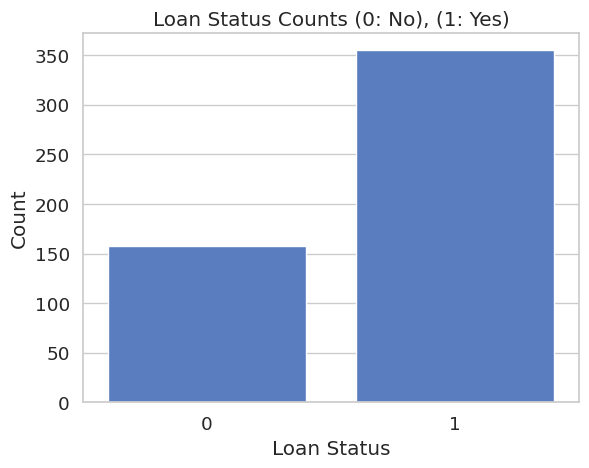

In [ ]:
sns.countplot(x=train_df["loan_status"])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Loan Status Counts (0: No), (1: Yes)")
plt.show()


**Notice**: It's clearly seen that the training dataset is impalance around ~150 applicant loans were rejected and around ~350 applicant were accepted.

This might cause a model to predict Yes (approve) the loan request always.

### **B: Studying the percentages of the categorical data** - Piechart
to better understand the percentages in each type, so when I will analzye agains the `loan_status` next I better understand the numbers

In [ ]:
categorical

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area']

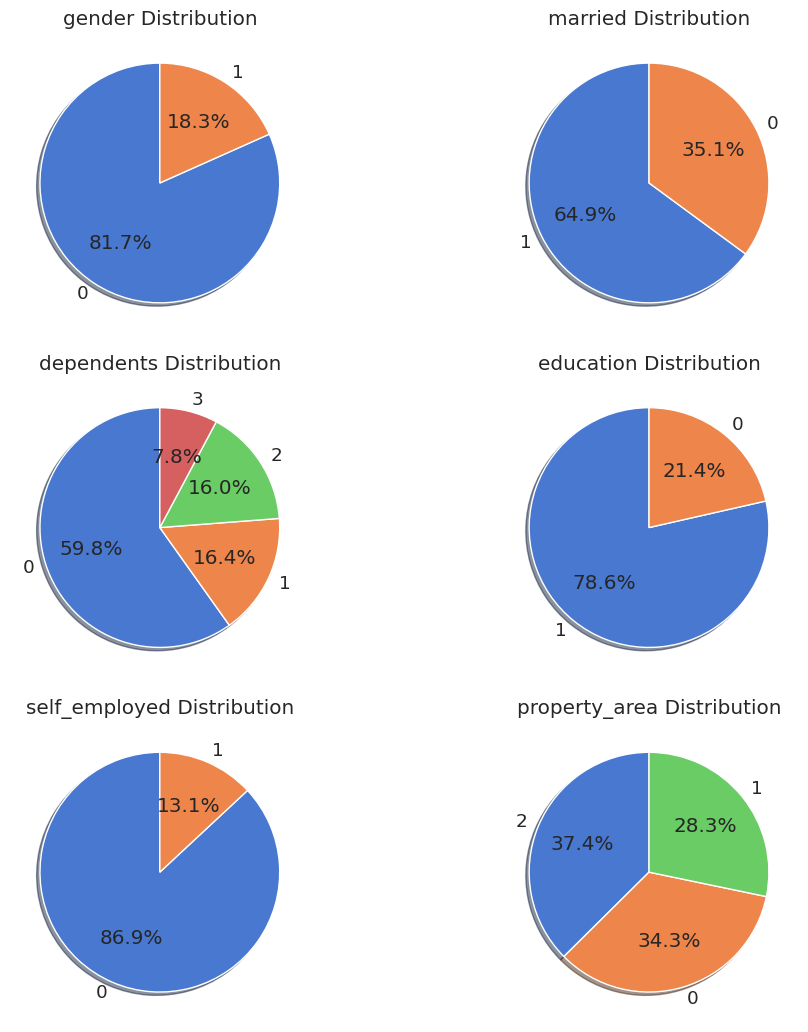

In [ ]:
plt.figure(figsize=(10, 14))

for i, col in enumerate(categorical, 1):
    plt.subplot(4, 2, i)  # adjust rows/cols to fit all features
    train_df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',  # show percentages
        startangle=90,      # start the first slice at the top
        shadow=True
    )
    plt.title(f"{col} Distribution")
    plt.ylabel('')  # remove default ylabel for cleanliness

plt.tight_layout()
plt.show()


**Notice:**
* `gender`: ~80% are males! Males are the dominant.
* `married`: The married people who applied for loans are double the number of the single (non-married) applicants.
* `dependents`: Mostly who have no dependants who applied for loans.
* `education: Most of those who applied for loans are graduates "~80%"
* `self_employed`: Most of those who applied for loans are not self employed "~90%"
* `property_area`: The portion here in all the three categories are almost equal with "~30%"

### **C: Conditioning Loan Status on each categorical variable** - Countplot
Within this category, how are approvals and rejections distributed?

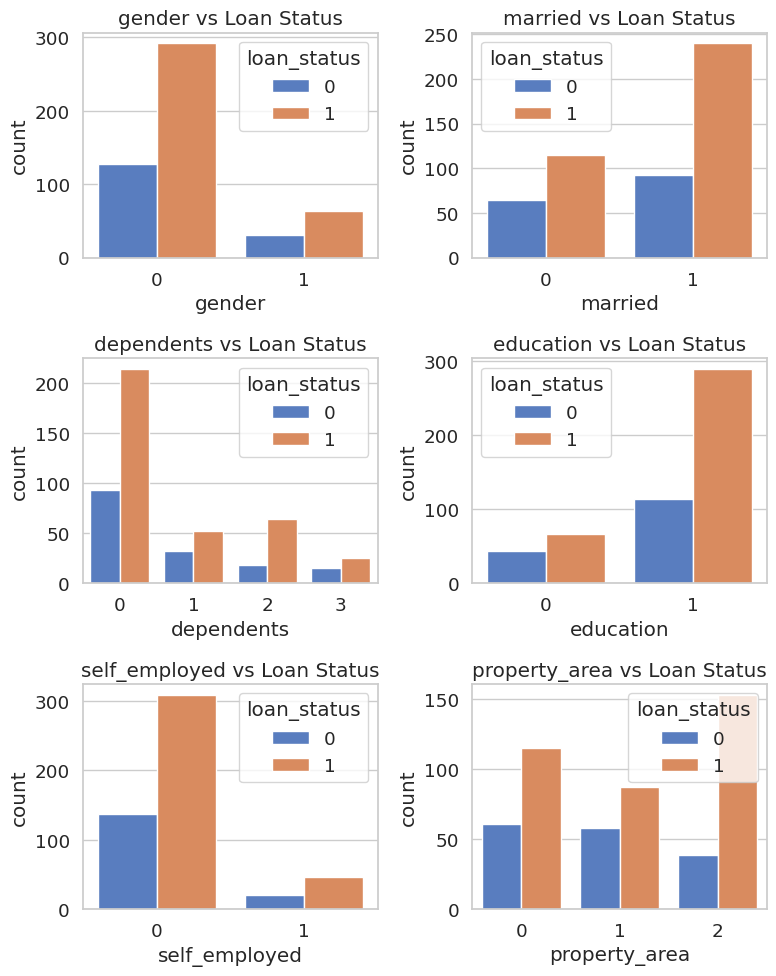

In [ ]:
plt.figure(figsize=(8, 10))

for i, col in enumerate(train_df[categorical], 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue="loan_status", data=train_df)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
train_df.shape

(513, 12)

### **D: Visualizing the distribution of all the numerical values** - Histograms and Boxplots

In [ ]:
numerical

['applicantincome',
 'coapplicantincome',
 'loanamount',
 'loan_amount_term',
 'credit_history']

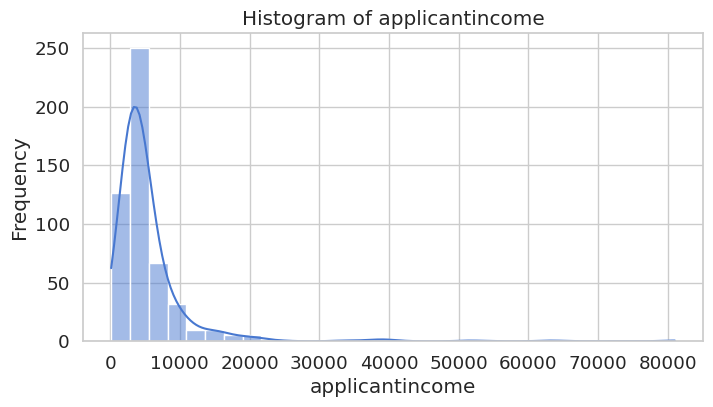

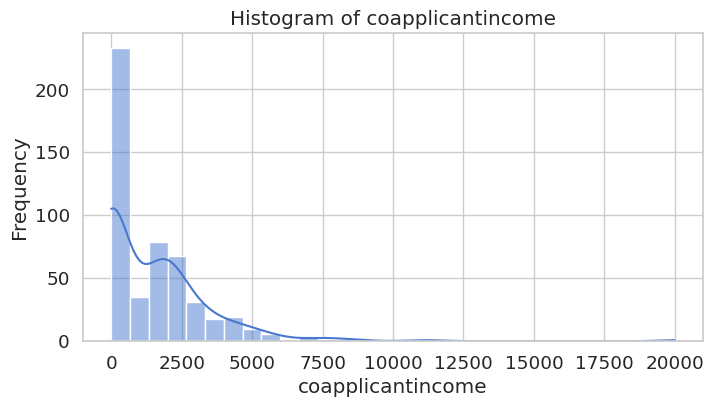

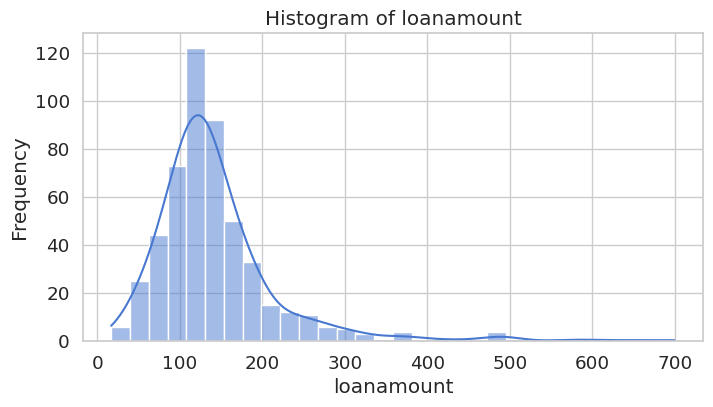

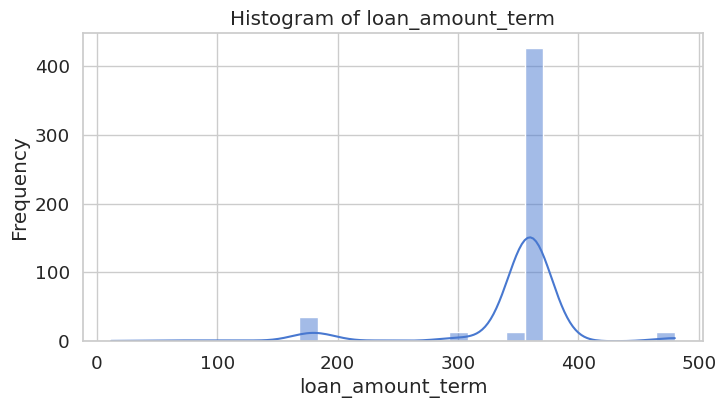

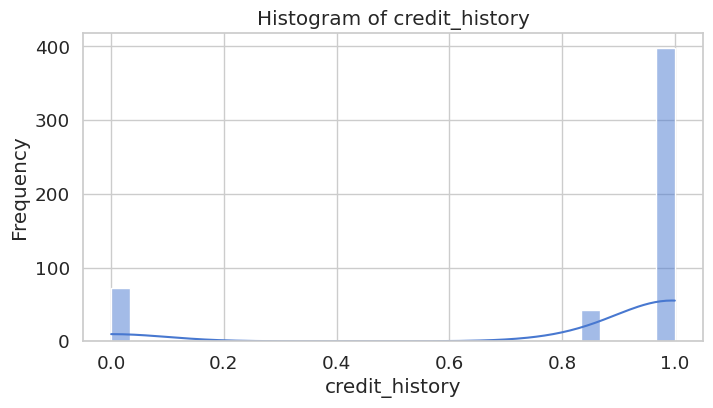

In [ ]:
for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], bins=30, kde=True)  # kde=True adds a smooth curve
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Notice:**
* `applicantincome`: Positively skewed
* `coapplicantincome`:Positively skewed
* `loanamount`: Almost a normal distribution: with a median or most common requested loan is around the ~150
* `loan_amount_term`: Lol, just discovered that this should be a category.
* `credit_history`: Lol, just discovered that this should be a category too! But I should submit the challange.

In [ ]:
# The description of the numerical values
train_df[numerical].describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,513.000000,513.000000,513.000000,513.000000,513.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,81.724688,62.503438,0.345083
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,128.000000,360.000000,1.000000
75%,5746.000000,2283.000000,160.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


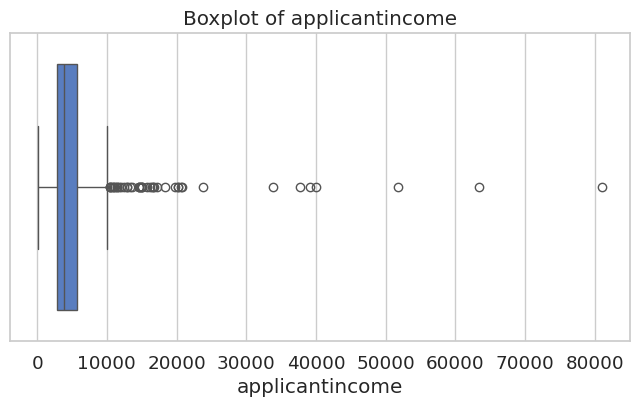

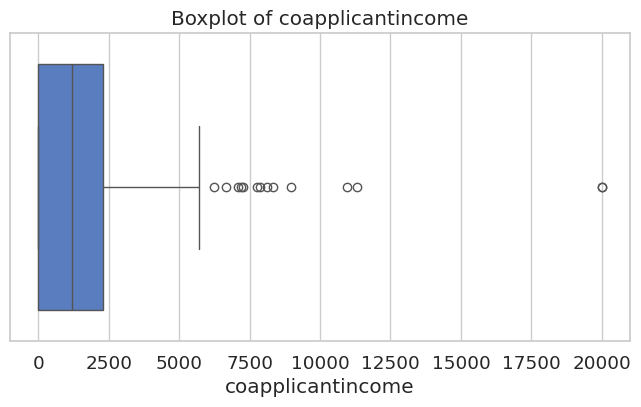

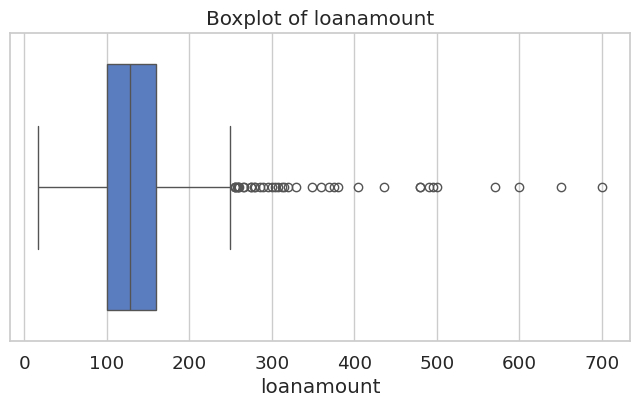

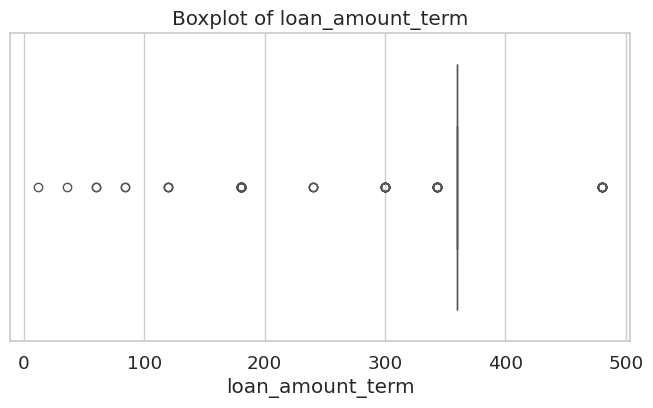

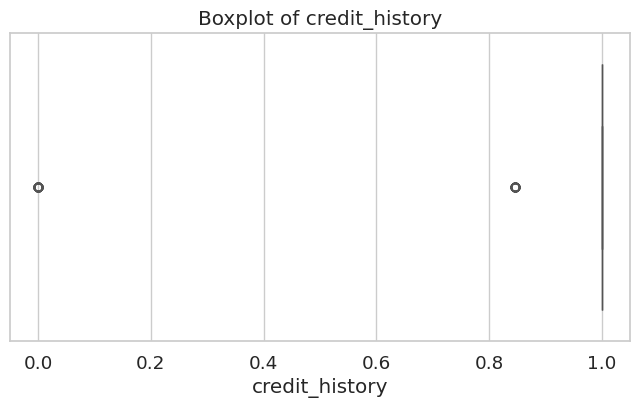

In [ ]:
for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### **E: Correlation for the Numerical Values** - Heat Map


<Axes: >

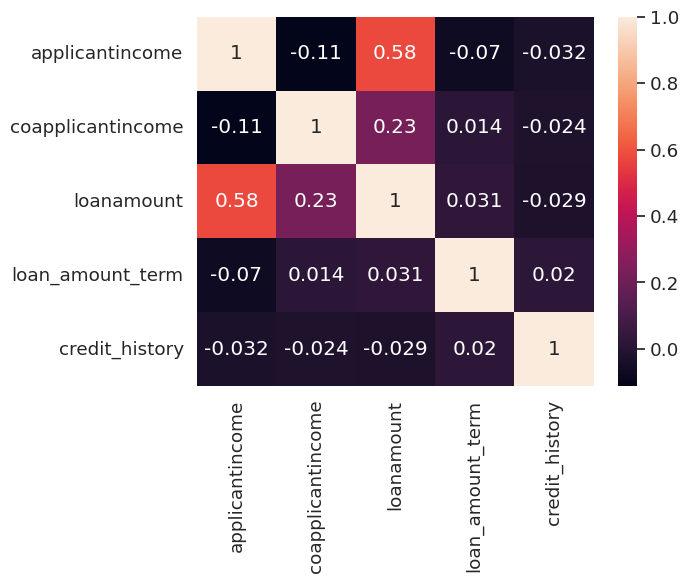

In [ ]:
corr_df = train_df[numerical].corr(method = "pearson")
sns.heatmap(corr_df,annot=True)

**Notice**

The `application_income` is correlated with the `loanamount`

## 6- **Treating the Testing Dataset**

In [ ]:
test_df  = pd.read_csv("test.csv")

In [ ]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,70.0,180,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,311.0,360,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428,150.0,360,1.0,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632,113.0,480,1.0,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800,123.0,360,0.0,Semiurban,N


In [ ]:
# Lowering all the coulmns names
test_df.columns = test_df.columns.str.lower()
test_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,70.0,180,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,311.0,360,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428,150.0,360,1.0,Rural,Y
3,LP002670,Female,Yes,2,Graduate,No,2031,1632,113.0,480,1.0,Semiurban,Y
4,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800,123.0,360,0.0,Semiurban,N


In [ ]:
categorical = list(test_df.dtypes[test_df.dtypes == 'object'].index)
print("Categorical Columns")
print(categorical)

print("")

numerical = list(test_df.dtypes[test_df.dtypes != 'object'].index)
print("Numerical Columns")
print(numerical)

Categorical Columns
['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'property_area', 'loan_status']

Numerical Columns
['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history']


In [ ]:
# Lowering all the column values (Categorical only)
for col in categorical:
    test_df[col] = test_df[col].str.lower().str.replace(' ', '_')

test_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp002648,male,yes,0,graduate,no,2130,6666,70.0,180,1.0,semiurban,n
1,lp002652,male,no,0,graduate,no,5815,3666,311.0,360,1.0,rural,n
2,lp002659,male,yes,3+,graduate,no,3466,3428,150.0,360,1.0,rural,y
3,lp002670,female,yes,2,graduate,no,2031,1632,113.0,480,1.0,semiurban,y
4,lp002682,male,yes,NaN,not_graduate,no,3074,1800,123.0,360,0.0,semiurban,n


In [ ]:
# Shape of the data
print("Shape of the Testing Dataset: ", test_df.shape)

Shape of the Testing Dataset:  (101, 13)


In [ ]:
# Calculating the null values
print("Null Values per column", test_df.isnull().sum())

Null Values per column loan_id              0
gender               3
married              0
dependents           3
education            0
self_employed        5
applicantincome      0
coapplicantincome    0
loanamount           4
loan_amount_term     0
credit_history       7
property_area        0
loan_status          0
dtype: int64


In [ ]:
# Filling the missing values with the mode
test_df["gender"].fillna(gender_mode, inplace=True)
test_df["dependents"].fillna(dependents_mode, inplace=True)
test_df["self_employed"].fillna(self_employed_mode, inplace=True)

# Recheching for the null values
print("Null Values per column", test_df[categorical].isnull().sum())

Null Values per column loan_id          0
gender           0
married          0
dependents       0
education        0
self_employed    0
property_area    0
loan_status      0
dtype: int64


/tmp/ipython-input-1393248087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["gender"].fillna(gender_mode, inplace=True)
/tmp/ipython-input-1393248087.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
# Filling the missing values with the mean
test_df["loanamount"].fillna(loanamount_mean, inplace=True)
test_df["credit_history"].fillna(credit_history_mean, inplace=True)

# Recheching for the null values
print("Null Values per column", test_df[numerical].isnull().sum())


Null Values per column applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
dtype: int64


/tmp/ipython-input-1221558860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["loanamount"].fillna(loanamount_mean, inplace=True)
/tmp/ipython-input-1221558860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# Now Rechecking the whole dataset
print("Null Values per column", test_df.isnull().sum())

Null Values per column loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [ ]:
test_df.drop(columns=['loan_id'], inplace=True)
test_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,yes,0,graduate,no,2130,6666,70.0,180,1.0,semiurban,n
1,male,no,0,graduate,no,5815,3666,311.0,360,1.0,rural,n
2,male,yes,3+,graduate,no,3466,3428,150.0,360,1.0,rural,y
3,female,yes,2,graduate,no,2031,1632,113.0,480,1.0,semiurban,y
4,male,yes,0,not_graduate,no,3074,1800,123.0,360,0.0,semiurban,n


In [ ]:
# Defining dictionaries
gender = {"male":0, "female":1}
married = {"no":0, "yes":1}
property_area = {"urban":0, "rural":1, "semiurban":2}
education = {"not_graduate":0, "graduate":1}
self_employed = {"no":0, "yes":1}
loan_status = {"n":0, "y":1}
dependants = {"0":0, "1":1, "2":2, "3+":3}


# Replacing column with values
test_df['gender'] = test_df["gender"].apply(lambda x: gender[x])
test_df["married"] = test_df["married"].apply(lambda x: married[x])
test_df["property_area"] = test_df["property_area"].apply(lambda x: property_area[x])
test_df["education"] = test_df["education"].apply(lambda x: education[x])
test_df["self_employed"] = test_df["self_employed"].apply(lambda x: self_employed[x])
test_df["loan_status"] = test_df["loan_status"].apply(lambda x: loan_status[x])
test_df["dependents"] = test_df["dependents"].apply(lambda x: dependants[x])

# Printing head to verify
test_df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,1,0,2130,6666,70.0,180,1.0,2,0
1,0,0,0,1,0,5815,3666,311.0,360,1.0,1,0
2,0,1,3,1,0,3466,3428,150.0,360,1.0,1,1
3,1,1,2,1,0,2031,1632,113.0,480,1.0,2,1
4,0,1,0,0,0,3074,1800,123.0,360,0.0,2,0


In [ ]:
categorical

['loan_id',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

In [ ]:
categorical = [
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area']

In [ ]:
categorical

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area']

In [ ]:
# Transforming all
for col in categorical:
    test_df[col] = test_df[col].astype('category')

test_df["loan_status"] = test_df["loan_status"].astype('category')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             101 non-null    category
 1   married            101 non-null    category
 2   dependents         101 non-null    category
 3   education          101 non-null    category
 4   self_employed      101 non-null    category
 5   applicantincome    101 non-null    int64   
 6   coapplicantincome  101 non-null    int64   
 7   loanamount         101 non-null    float64 
 8   loan_amount_term   101 non-null    int64   
 9   credit_history     101 non-null    float64 
 10  property_area      101 non-null    category
 11  loan_status        101 non-null    category
dtypes: category(7), float64(2), int64(3)
memory usage: 5.7 KB


## **7- Building the Model**

### Preparing the data before feeding it into the model

In [ ]:
# store all columns excpet last one as inputs in X
x_train = train_df.iloc[:,0:-1].values
x_test = test_df.iloc[:,0:-1].values

# store the last column as the output (label) in y
y_train = train_df.iloc[:,-1].values
y_test= test_df.iloc[:,-1].values


print(x_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)


(513, 11) (513,)
(101,) (101,)


### Normalize the Data

In [ ]:
# Normalize the data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Building the Regression Model

In [ ]:
# define our regression model
model = LogisticRegression()

# train our model
model.fit(x_train, y_train)
print('YAY! My Linear Regression Model is now trained! Succesfully')

YAY! My Linear Regression Model is now trained! Succesfully


In [ ]:
y_test

[0, 0, 1, 1, 0, ..., 1, 1, 1, 1, 0]
Length: 101
Categories (2, int64): [0, 1]

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## **8- Evaluating the model**

In [ ]:
# Evaluating the Linear Regression Model

print("Accuracy: \n", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy: 
 0.8118811881188119
Confusion Matrix: 
 [[16 18]
 [ 1 66]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.47      0.63        34
           1       0.79      0.99      0.87        67

    accuracy                           0.81       101
   macro avg       0.86      0.73      0.75       101
weighted avg       0.84      0.81      0.79       101



In [ ]:
model.coef_[0]

array([-0.00350353,  0.21612252,  0.03818274,  0.21670107, -0.03231525,
        0.0797245 ,  0.02865583, -0.24741753, -0.28940447,  1.27968211,
        0.35756177])

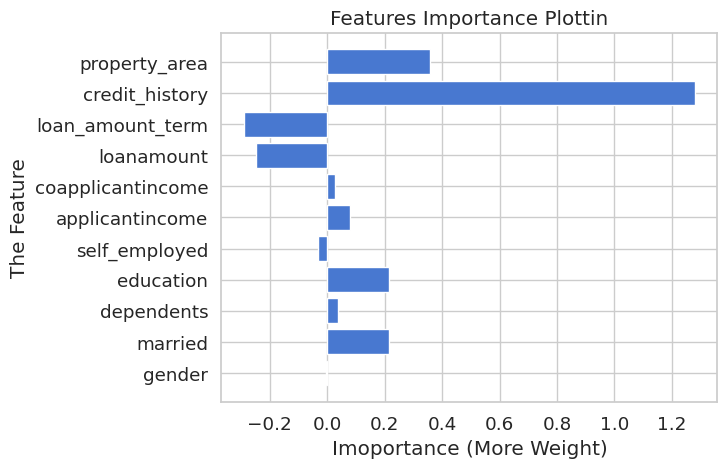

In [ ]:
# Feature Importance based on the weights of the model

columns = train_df.columns[0:-1].values
features_importance = model.coef_[0] # Extract the first (and only) row of coefficients
plt.barh(columns, features_importance)
plt.title('Features Importance Plottin')
plt.xlabel('Imoportance (More Weight)')
plt.ylabel('The Feature')
plt.show()

It's clear that the `credit_history` has the most weight (Importance) compared to other features.

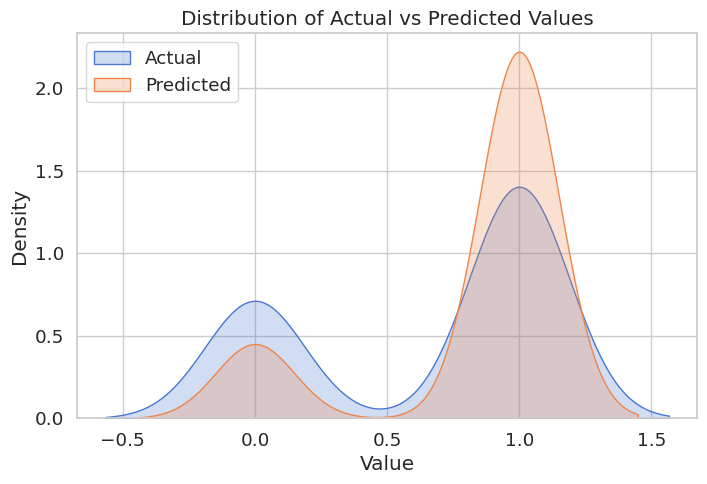

In [ ]:
plt.figure(figsize=(8, 5))

y_test = y_test.astype(float)
sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(y_pred, label="Predicted", fill=True)

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()

plt.show()


The model is almost predicting the values as the Actual `y_test` and the predictions `y_pred` have a kind of similar distributions.